This is a program which is in testing phase. We will use a linear regression ML model to give an SOC number for the flights.

In [1]:
# Import the querying module
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [2]:
# ONE-HOT ENCODE
# https://stackabuse.com/one-hot-encoding-in-python-with-pandas-and-scikit-learn/
def one_hot(df, col, pre):
  encoded = pd.get_dummies(df[col], prefix=pre)
  for column in encoded:
    encoded = encoded.rename(columns={column: col + "_" + column})
  encoded['unique_data_identifier'] = df['unique_data_identifier']
  return encoded

In [3]:
all_data = pd.read_csv("ml_model_outputs/all_data.csv")

In [4]:
encoded_data  = one_hot(all_data, "activity", "is")
X = pd.merge(all_data, encoded_data, on=["unique_data_identifier"])
Y = X["soc_delta"].to_numpy()
X.drop(columns=["soc_delta", "activity",  "id", "unique_data_identifier"], inplace=True)

In [5]:
# Split the data into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=43)

In [6]:
print(f"Length train_x = {len(train_X)} \n Length train_y = {len(train_y)}")

Length train_x = 1199 
 Length train_y = 1199


In [7]:
print(f"Length test_x = {len(test_X)} \n Length test_y = {len(test_y)}")

Length test_x = 514 
 Length test_y = 514


Machine Learning Model Implementation

In [8]:
from sklearn.ensemble import RandomForestRegressor

# Set model for regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=30)

# Fit model
rf_model.fit(train_X, train_y)

RandomForestRegressor(random_state=30)

In [9]:
# Make predictions using the testing set
y_pred = rf_model.predict(test_X)

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error

# Mean Squared Error (MSE)
mse = mean_squared_error(test_y, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Coefficient of Determination (R-squared)
r_squared = r2_score(test_y, y_pred)
print(f'Coefficient of Determination (R-squared): {r_squared}')

# K-fold Cross-Validation for R-squared
cross_val_r_squared = cross_val_score(rf_model, train_X, train_y, cv=5, scoring='r2')
print(f'Cross-validated R-squared: {np.mean(cross_val_r_squared)}')

# Mean Absolute Error (MAE)
mae = mean_absolute_error(test_y, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(test_y, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

from sklearn.model_selection import cross_val_score, KFold

# Define the number of folds (k)
num_folds = 12  # You can adjust this based on your preference

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation for R-squared
cross_val_r_squared = cross_val_score(rf_model, train_X, train_y, cv=kf, scoring='r2')

# Display the results
print(f'K-fold Cross-validated R-squared: {np.mean(cross_val_r_squared)}')

Mean Squared Error (MSE): 0.7974453331906616
Coefficient of Determination (R-squared): 0.8790315660219418
Cross-validated R-squared: 0.8524477863952942
Mean Absolute Error (MAE): 0.3739058365758755
Root Mean Squared Error (RMSE): 0.8929979469129039
K-fold Cross-validated R-squared: 0.8552656226277917


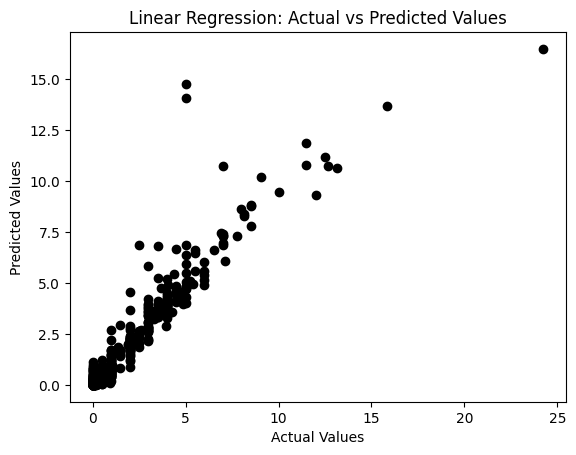

In [11]:
import matplotlib.pyplot as plt

# Plot outputs
plt.scatter(test_y, y_pred, color="black")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted Values")

plt.show()

In [12]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display the feature importances
coeff = pd.DataFrame(list(zip(train_X.columns, feature_importances)), columns=['Feature', 'Importance'])
coeff.sort_values('Importance', ascending=False, inplace=True)

# Print the sorted DataFrame
print(coeff)

                        Feature    Importance
0                    time_delta  6.577376e-01
2              average_altitude  1.157556e-01
4                 average_power  1.139605e-01
3                  ground_speed  3.650466e-02
9             activity_is_climb  3.034957e-02
20          activity_is_takeoff  1.386912e-02
10           activity_is_cruise  1.103883e-02
1                           soh  8.119358e-03
5                   temperature  5.943615e-03
7                    wind_speed  4.403267e-03
6                    visibility  1.377008e-03
16       activity_is_pre-flight  5.949542e-04
17      activity_is_slow flight  7.546141e-05
11          activity_is_descent  7.308157e-05
12          activity_is_landing  5.906339e-05
14  activity_is_power off stall  5.444526e-05
19      activity_is_steep turns  5.079010e-05
13      activity_is_post-flight  1.980744e-05
8             activity_is_HASEL  1.002502e-05
15   activity_is_power on stall  2.845640e-06
18       activity_is_steep turn  3

In [13]:
import joblib

model_filename = 'ML_model_outputs/prescription_randomforest_model.joblib'
joblib.dump(rf_model, model_filename)

print(f"Model saved to {model_filename}")

Model saved to ML_model_outputs/prescription_randomforest_model.joblib
